In [35]:
# linear modelling functions
# !pip install ipynb
import ipynb.fs.full.general_model_pipeline_vl as gmp

# packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#### Setting aside some testing data first:

This code uses 80% for training data, 20% for testing data.

In [20]:
# set the seed for reproducibility
rs = 100
np.random.seed(100)

In [3]:
data = pd.read_csv('../../data/nu3-pctfoodsupply-CO2-emissions.csv').drop(columns=['Unnamed: 0'])
data.head()

porksupply_pct  chickensupply_pct  beefsupply_pct  lambsupply_pct  \
0        0.024475           0.090031        0.129201        0.003633   
1        0.051904           0.099164        0.072803        0.021222   
2        0.020423           0.024834        0.042235        0.028758   
3        0.045923           0.056891        0.028287        0.044716   
4        0.061759           0.096919        0.062313        0.052394   

   fishsupply_pct  eggsupply_pct  milkcheesesupply_pct  wheatprodsupply_pct  \
0        0.010153       0.026525              0.454298             0.240120   
1        0.038036       0.018298              0.504182             0.151498   
2        0.007227       0.023370              0.570120             0.260244   
3        0.157545       0.017446              0.478118             0.154390   
4        0.056411       0.027458              0.380278             0.213094   

   ricesupply_pct  soybeansupply_pct  nutssupply_pct  totalco2      Country  
0        0.020423           0.000000        0.001141   2172.40    Argentina  
1        0.023716           0.000409        0.018771   1938.64    Australia  
2        0.014604           0.000000        0.008184   1777.84      Albania  
3        0.008236           0.000233        0.008215   1731.35      Iceland  
4        0.025380           0.001219        0.022775   1750.94  New Zealand

In [4]:
train_data = data.sample(frac=0.80)
test_data = data[data['Country'].apply(lambda x: x not in train_data['Country'].values)]

train_data.drop(columns='Country', inplace=True)
test_data.drop(columns='Country', inplace=True)

C:\Users\vince\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
train_data.shape, test_data.shape

((104, 12), (26, 12))

## Forecasting and Prediction Modeling (25 points)

This section is where the rubber meets the road.  In it you must:
1. Explore at least 3 prediction modeling approaches for each prediction question, ranging from the simple (e.g. linear regression, KNN) to the complex (e.g. SVM, random forests, Lasso).  
2. Motivate all your modeling decisions.  This includes parameter choices (e.g., how many folds in k-fold cross validation, what time window you use for averaging your data) as well as model form (e.g., If you use regression trees, why?  If you include nonlinear features in a regression model, why?). 
1. Carefully describe your cross validation and model selection process.  You should partition your data into training and testing data sets.  The training data set is what you use for cross-validation (i.e. you sample from within it to create folds, etc.).  The testing data set is held to the very end of your efforts, and used to compare qualitatively different models (e.g. OLS vs random forests).
4. Very carefully document your workflow.  We will be reading a lot of projects, so we need you to explain each basic step in your analysis.  
5. Seek opportunities to write functions allow you to avoid doing things over and over, and that make your code more succinct and readable. 

### Prediction Model 1: Simple Linear Regression

Splitting data...
Fitting Model...
[Train MSE: 80193.3694]
[Train R^2: 0.436733814081778]
[Test MSE: 109424.2785]
[Test R^2: 0.436733814081778]
----FINISHED----


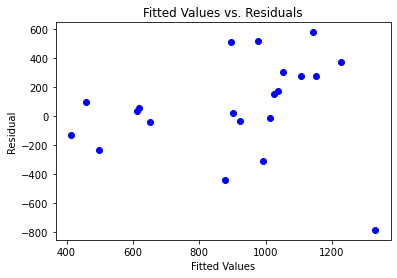

In [13]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data, 'totalco2')

lr_model = LinearRegression()
lr_model = gmp.run_model(X_train, X_val, y_train, y_val, model, diagnostics=True)

### Prediction Model 2: Ridge Regression

In [8]:
X_train, X_val, y_val, y_val = gmp.preprocess_data(train_data, 'totalco2', standardize = True)

alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gmp.linreg_kfold_cv(RidgeCV, X_train, X_val, y_train, y_val, alphas)

Splitting data...
optimal alpha: 10.0
Test MSE with cross-validated RidgeCV: 114183.59965306723
[R^2: 0.412235003730579]


C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79387e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.76087e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


10.0

In [17]:
alpha2 = np.arange(0, 40, 1)
gmp.linreg_kfold_cv(RidgeCV, X_train, X_val, y_train, y_val, alpha2)

C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79387e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.76087e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


optimal alpha: 31
Test MSE with cross-validated RidgeCV: 121702.83107457834
[R^2: 0.3735294361898672]


31

Splitting data...
Fitting Model...
[Train MSE: 85994.4979]
[Train R^2: 0.3735294361898672]
[Test MSE: 121702.8311]
[Test R^2: 0.3735294361898672]
----FINISHED----


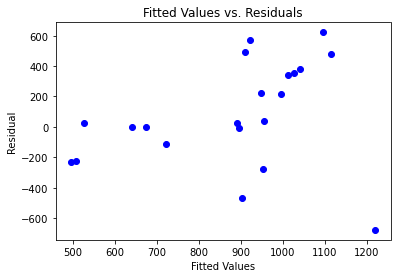

In [29]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data, 'totalco2', standardize = True)

ridge_model = Ridge(alpha=31)
ridge_model = gmp.run_model(X_train, X_val, y_train, y_val, ridge_model, diagnostics=True)

### Prediction Model 3: Decision Tree

In [26]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data, 'totalco2', standardize = False)

tree_model = DecisionTreeRegressor(random_state = rs, max_depth = 4)
tree_model = gmp.run_model(X_train, X_val, y_train, y_val, tree_model, diagnostics=False)

Splitting data...
Fitting Model...
[Train MSE: 16360.7591]
[Train R^2: 0.058312773690047726]
[Test MSE: 182939.1643]
[Test R^2: 0.058312773690047726]
----FINISHED----


In [34]:
pd.DataFrame({'Prediction' : ridge_model.predict(X_val), 'True' : y_val})

Prediction     True
18   1026.770560  1381.90
121   506.714273   282.62
22   1013.371341  1356.75
81   1220.902407   542.89
45    896.451165   889.11
109   495.359283   262.55
90    903.578151   434.08
5    1096.041399  1718.86
7    1116.399189  1598.41
77    675.385593   672.07
26    996.630831  1211.16
19    921.918941  1494.29
39    956.652744   996.14
74    721.723717   610.41
96    527.152080   554.64
84    641.786085   644.06
64    954.296228   678.94
43    892.380216   918.60
30    949.180805  1174.28
21    911.107765  1405.70
20   1041.601109  1424.67

### Prediction Model 4: Random Forest

In [43]:
forest_model = RandomForestRegressor(n_estimators = 500, random_state = rs, max_depth = 3)
forest_model = gmp.run_model(X_train, X_val, y_train, y_val, forest_model, diagnostics=False)

Fitting Model...
[Train MSE: 28799.747]
[Train R^2: 0.42070344277634464]
[Test MSE: 112538.4577]
[Test R^2: 0.42070344277634464]
----FINISHED----


In [44]:
pd.DataFrame({'Prediction' : forest_model.predict(X_val), 'True' : y_val})

Prediction     True
18   1317.464203  1381.90
121   493.227352   282.62
22   1221.366439  1356.75
81    808.135386   542.89
45    726.270635   889.11
109   528.587668   262.55
90    865.807289   434.08
5    1350.058685  1718.86
7    1160.313879  1598.41
77    530.593772   672.07
26   1110.359391  1211.16
19    672.389567  1494.29
39   1097.988688   996.14
74    563.744221   610.41
96    476.354906   554.64
84    602.741073   644.06
64    698.376987   678.94
43    704.940854   918.60
30   1000.046652  1174.28
21    841.308765  1405.70
20    722.184010  1424.67

---

## Interpretation and Conclusions (20 points)
In this section you must relate your modeling and forecasting results to your original prediction question.  You must:
1. Address a resource allocation question.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  How might they allocate their resources differently with the results of your model?  Why should the reader care about your results?
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Shoot for 500-1000 words for this section.